# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -5.796638
c   -4.620118
d    1.734400
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    10.762505
2018-11-20 14:45:00    10.762554
2018-11-21 14:45:00     9.778404
2018-11-22 14:45:00     9.514713
Freq: D, dtype: float64 

2018-11-19 14:45:00    10.762505
2018-11-20 14:45:00    10.762554
2018-11-21 14:45:00     9.778404
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,0.344704,-0.266903,-0.103347,0.549183
2018-11-19 15:45:00,-0.046669,-0.829235,0.365755,-0.248919
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,0.389347
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,0.776431
2018-11-19 18:45:00,-1.002223,-0.330960,0.530958,0.230226
2018-11-19 19:45:00,0.108908,-0.457571,-1.322001,0.001617
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,1.201170
2018-11-19 21:45:00,1.107114,0.065162,0.648066,-0.833506
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,0.115266
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,0.589980


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,0.344704,-0.266903,-0.103347,0.549183
2018-11-19 15:45:00,-0.046669,-0.829235,0.365755,-0.248919
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,0.389347
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,0.776431
2018-11-19 18:45:00,-1.002223,-0.330960,0.530958,0.230226


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,1.201170
2018-11-19 21:45:00,1.107114,0.065162,0.648066,-0.833506
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,0.115266
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,0.589980


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 3.44703683e-01, -2.66902611e-01, -1.03346872e-01,
         5.49183298e-01],
       [-4.66694383e-02, -8.29235148e-01,  3.65754586e-01,
        -2.48919151e-01],
       [-5.57278332e-01, -4.30906880e-01, -8.96543490e-01,
         3.89347018e-01],
       [-2.77686049e-01, -1.47641627e+00, -2.90769148e-01,
         7.76430964e-01],
       [-1.00222298e+00, -3.30960383e-01,  5.30957873e-01,
         2.30225718e-01],
       [ 1.08908423e-01, -4.57571122e-01, -1.32200103e+00,
         1.61696616e-03],
       [ 4.90378588e-01, -4.05817784e-02,  6.53644044e-01,
         1.20117027e+00],
       [ 1.10711362e+00,  6.51617674e-02,  6.48065508e-01,
        -8.33505714e-01],
       [-3.07142346e-01,  3.95490890e-01,  2.84654720e+00,
         1.15266415e-01],
       [ 1.65722057e+00,  8.91014099e-01, -1.89834618e+00,
         5.89980386e-01]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.151733,-0.248091,0.053396,0.277080
std,0.788926,0.648415,1.316041,0.567859
min,-1.002223,-1.476416,-1.898346,-0.833506
25%,-0.299778,-0.450905,-0.745100,0.030029
50%,0.031119,-0.298931,0.131204,0.309786
75%,0.453960,0.038726,0.618789,0.579781
max,1.657221,0.891014,2.846547,1.201170


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,0.344704,-0.046669,-0.557278,-0.277686,-1.002223,0.108908,0.490379,1.107114,-0.307142,1.657221
B,-0.266903,-0.829235,-0.430907,-1.476416,-0.330960,-0.457571,-0.040582,0.065162,0.395491,0.891014
C,-0.103347,0.365755,-0.896543,-0.290769,0.530958,-1.322001,0.653644,0.648066,2.846547,-1.898346
D,0.549183,-0.248919,0.389347,0.776431,0.230226,0.001617,1.201170,-0.833506,0.115266,0.589980


In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,0.549183,-0.103347,-0.266903,0.344704
2018-11-19 15:45:00,-0.248919,0.365755,-0.829235,-0.046669
2018-11-19 16:45:00,0.389347,-0.896543,-0.430907,-0.557278
2018-11-19 17:45:00,0.776431,-0.290769,-1.476416,-0.277686
2018-11-19 18:45:00,0.230226,0.530958,-0.330960,-1.002223
2018-11-19 19:45:00,0.001617,-1.322001,-0.457571,0.108908
2018-11-19 20:45:00,1.201170,0.653644,-0.040582,0.490379
2018-11-19 21:45:00,-0.833506,0.648066,0.065162,1.107114
2018-11-19 22:45:00,0.115266,2.846547,0.395491,-0.307142
2018-11-19 23:45:00,0.589980,-1.898346,0.891014,1.657221


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,0.589980
2018-11-19 19:45:00,0.108908,-0.457571,-1.322001,0.001617
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,0.389347
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,0.776431
2018-11-19 14:45:00,0.344704,-0.266903,-0.103347,0.549183
2018-11-19 15:45:00,-0.046669,-0.829235,0.365755,-0.248919
2018-11-19 18:45:00,-1.002223,-0.330960,0.530958,0.230226
2018-11-19 21:45:00,1.107114,0.065162,0.648066,-0.833506
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,1.201170
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,0.115266


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    0.344704
2018-11-19 15:45:00   -0.046669
2018-11-19 16:45:00   -0.557278
2018-11-19 17:45:00   -0.277686
2018-11-19 18:45:00   -1.002223
2018-11-19 19:45:00    0.108908
2018-11-19 20:45:00    0.490379
2018-11-19 21:45:00    1.107114
2018-11-19 22:45:00   -0.307142
2018-11-19 23:45:00    1.657221
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    0.344704
2018-11-19 15:45:00   -0.046669
2018-11-19 16:45:00   -0.557278
2018-11-19 17:45:00   -0.277686
2018-11-19 18:45:00   -1.002223
2018-11-19 19:45:00    0.108908
2018-11-19 20:45:00    0.490379
2018-11-19 21:45:00    1.107114
2018-11-19 22:45:00   -0.307142
2018-11-19 23:45:00    1.657221
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  0.344704 -0.266903 -0.103347  0.549183
2018-11-19 15:45:00 -0.046669 -0.829235  0.365755 -0.248919
2018-11-19 16:45:00 -0.557278 -0.430907 -0.896543  0.389347
                            A         B         C         D
2018-11-19 14:45:00  0.344704 -0.266903 -0.103347  0.549183
2018-11-19 15:45:00 -0.046669 -0.829235  0.365755 -0.248919
2018-11-19 16:45:00 -0.557278 -0.430907 -0.896543  0.389347


### Selection by label

In [25]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.344704
B   -0.266903
C   -0.103347
D    0.549183
Name: 2018-11-19 14:45:00, dtype: float64

In [26]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,0.344704,-0.266903
2018-11-19 15:45:00,-0.046669,-0.829235
2018-11-19 16:45:00,-0.557278,-0.430907
2018-11-19 17:45:00,-0.277686,-1.476416
2018-11-19 18:45:00,-1.002223,-0.330960
2018-11-19 19:45:00,0.108908,-0.457571
2018-11-19 20:45:00,0.490379,-0.040582
2018-11-19 21:45:00,1.107114,0.065162
2018-11-19 22:45:00,-0.307142,0.395491
2018-11-19 23:45:00,1.657221,0.891014


In [27]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-1.002223,-0.330960
2018-11-19 19:45:00,0.108908,-0.457571
2018-11-19 20:45:00,0.490379,-0.040582


In [28]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.04666943830171499
-0.04666943830171499


### Selecting by position

In [29]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.277686
B   -1.476416
C   -0.290769
D    0.776431
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -0.277686 -1.476416
2018-11-19 18:45:00 -1.002223 -0.330960


In [30]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.046669,0.365755
2018-11-19 16:45:00,-0.557278,-0.896543
2018-11-19 18:45:00,-1.002223,0.530958


In [31]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00 -0.046669 -0.829235  0.365755 -0.248919
2018-11-19 16:45:00 -0.557278 -0.430907 -0.896543  0.389347 

                            B         C
2018-11-19 14:45:00 -0.266903 -0.103347
2018-11-19 15:45:00 -0.829235  0.365755
2018-11-19 16:45:00 -0.430907 -0.896543
2018-11-19 17:45:00 -1.476416 -0.290769
2018-11-19 18:45:00 -0.330960  0.530958
2018-11-19 19:45:00 -0.457571 -1.322001
2018-11-19 20:45:00 -0.040582  0.653644
2018-11-19 21:45:00  0.065162  0.648066
2018-11-19 22:45:00  0.395491  2.846547
2018-11-19 23:45:00  0.891014 -1.898346


In [32]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.8292351479139495

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 21:45:00,1.107114,0.065162,0.648066,-0.833506
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,0.115266
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,0.589980


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,0.344704,NaN,NaN,0.549183
2018-11-19 15:45:00,NaN,NaN,0.365755,NaN
2018-11-19 16:45:00,NaN,NaN,NaN,0.389347
2018-11-19 17:45:00,NaN,NaN,NaN,0.776431
2018-11-19 18:45:00,NaN,NaN,0.530958,0.230226
2018-11-19 19:45:00,0.108908,NaN,NaN,0.001617
2018-11-19 20:45:00,0.490379,NaN,0.653644,1.201170
2018-11-19 21:45:00,1.107114,0.065162,0.648066,NaN
2018-11-19 22:45:00,NaN,0.395491,2.846547,0.115266
2018-11-19 23:45:00,1.657221,0.891014,NaN,0.589980


### Setting

Combination of selection and setting of values

In [35]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [36]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.266903,-0.103347,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.046669,-0.829235,0.365755,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,5,1.5,6,0.999657
2018-11-19 18:45:00,-1.002223,-0.330960,0.530958,5,2.0,8,0.999391
2018-11-19 19:45:00,0.108908,-0.457571,-1.322001,5,2.5,10,0.999048
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,5,3.0,12,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,5,4.0,16,0.997564
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,5,4.5,18,0.996917


In [37]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.266903,-0.103347,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.046669,-0.829235,-0.365755,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-1.002223,-0.330960,-0.530958,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.108908,-0.457571,-1.322001,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.490379,-0.040582,-0.653644,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.107114,-0.065162,-0.648066,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.307142,-0.395491,-2.846547,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-1.657221,-0.891014,-1.898346,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-0.266903,-0.103347,5,0.0,1.000000
2018-11-19 15:45:00,-0.046669,-0.829235,0.365755,5,0.5,0.999962
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,5,1.0,0.999848
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,5,1.5,0.999657
2018-11-19 18:45:00,-1.002223,-0.330960,0.530958,5,2.0,0.999391
2018-11-19 19:45:00,0.108908,-0.457571,-1.322001,5,2.5,0.999048
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,5,3.0,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,0.998135
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,5,4.0,0.997564
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,5,4.5,0.996917


In [39]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.266903,-0.103347,5,0.0,0,1.000000
2018-11-19 19:45:00,0.108908,-0.457571,-1.322001,5,2.5,10,0.999048
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,5,3.0,12,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.307142,0.395491,2.846547,5,4.0,16,0.997564
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.266903,-0.103347,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.046669,-0.829235,0.365755,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.557278,-0.430907,-0.896543,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.277686,-1.476416,-0.290769,5,1.5,6,0.999657
2018-11-19 18:45:00,-1.002223,-0.330960,0.530958,5,2.0,8,0.999391
2018-11-19 19:45:00,0.108908,-0.457571,-1.322001,5,2.5,10,0.999048
2018-11-19 20:45:00,0.490379,-0.040582,0.653644,5,3.0,12,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14,0.998135
2018-11-19 23:45:00,1.657221,0.891014,-1.898346,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,NaN,0.365755,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,NaN,0.530958,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.108908,NaN,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.490379,NaN,0.653644,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,0.395491,2.846547,5,4.0,16.0,0.997564
2018-11-19 23:45:00,1.657221,0.891014,NaN,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14.0,0.998135


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,True,True,True,False,True,True,False
2018-11-19 15:45:00,True,True,False,False,False,False,False
2018-11-19 16:45:00,True,True,True,False,False,False,False
2018-11-19 17:45:00,True,True,True,False,False,False,False
2018-11-19 18:45:00,True,True,False,False,False,False,False
2018-11-19 19:45:00,False,True,True,False,False,False,False
2018-11-19 20:45:00,False,True,False,False,False,False,False
2018-11-19 21:45:00,False,False,False,False,False,False,False
2018-11-19 22:45:00,True,False,False,False,False,False,False
2018-11-19 23:45:00,False,False,True,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.000000,0.000000,0.365755,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.000000,0.000000,0.530958,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.108908,0.000000,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.490379,0.000000,0.653644,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.000000,0.395491,2.846547,5,4.0,16.0,0.997564
2018-11-19 23:45:00,1.657221,0.891014,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,NaN,0.365755,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,NaN,0.365755,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,0.365755,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,NaN,0.530958,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.108908,NaN,0.530958,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.490379,NaN,0.653644,5,3.0,12.0,0.998630
2018-11-19 21:45:00,1.107114,0.065162,0.648066,5,3.5,14.0,0.998135
2018-11-19 22:45:00,1.107114,0.395491,2.846547,5,4.0,16.0,0.997564
2018-11-19 23:45:00,1.657221,0.891014,2.846547,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.117262
B         -0.248091
C          0.053396
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.804250
2018-11-19 15:45:00    1.141402
2018-11-19 16:45:00    1.302160
2018-11-19 17:45:00    1.636398
2018-11-19 18:45:00    2.171024
2018-11-19 19:45:00    2.404055
2018-11-19 20:45:00    3.157439
2018-11-19 21:45:00    3.616925
2018-11-19 22:45:00    4.133209
2018-11-19 23:45:00    4.163829
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.266903,-0.103347,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.046669,-1.096138,0.262408,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.603948,-1.527045,-0.634136,15,1.5,6,2.999810
2018-11-19 17:45:00,-0.881634,-3.003461,-0.924905,20,3.0,12,3.999467
2018-11-19 18:45:00,-1.883857,-3.334421,-0.393947,25,5.0,20,4.998858
2018-11-19 19:45:00,-1.774948,-3.791992,-1.715948,30,7.5,30,5.997906
2018-11-19 20:45:00,-1.284570,-3.832574,-1.062304,35,10.5,42,6.996536
2018-11-19 21:45:00,-0.177456,-3.767412,-0.414239,40,14.0,56,7.994670
2018-11-19 22:45:00,-0.484599,-3.371922,2.432309,45,18.0,72,8.992234
2018-11-19 23:45:00,1.172622,-2.480907,0.533962,50,22.5,90,9.989152


In [48]:
df.apply(lambda x: x.max() - x.min())

A           2.659444
B           2.367430
C           4.744893
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [49]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -0.266903
2018-11-19 15:45:00   -0.875905
2018-11-19 16:45:00   -0.988185
2018-11-19 17:45:00   -1.754102
2018-11-19 18:45:00   -1.333183
2018-11-19 19:45:00   -0.348663
2018-11-19 20:45:00    0.449797
2018-11-19 21:45:00    1.172275
2018-11-19 22:45:00    0.088349
2018-11-19 23:45:00    2.548235
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [50]:
file_name="/Users/mzanetti/data/LEMMA2018/DT/raw/data_000636.txt"
data=pd.read_csv(file_name)
data

FileNotFoundError: File b'/Users/mzanetti/data/LEMMA2018/DT/raw/data_000636.txt' does not exist

Let's know do some operations among (elements of) columns

In [51]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

NameError: name 'data' is not defined

In [52]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

NameError: name 'data' is not defined

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [53]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [54]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.041064,-1.214275
1,bar,one,-0.193829,-1.290428
2,foo,two,-0.507516,0.270962
3,bar,three,-0.346476,-0.059553
4,foo,two,0.501283,0.667621
5,bar,two,-1.598616,-0.372136
6,foo,one,-0.637528,-1.016884
7,foo,three,-1.682753,0.382748


In [55]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-2.138921,-1.722117
foo,-2.285449,-0.909827


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [58]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
#print (index)

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


first  second
bar    one      -0.622707
       two       0.238522
baz    one      -0.591321
       two      -0.453936
foo    one      -0.418212
       two      -0.252893
qux    one       1.386387
       two       0.457954
dtype: float64


In [59]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.193829 -1.290428
    three -0.346476 -0.059553
    two   -1.598616 -0.372136
foo one   -0.596464 -2.231158
    three -1.682753  0.382748
    two   -0.006232  0.938584

In [60]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.193829
            D   -1.290428
     three  C   -0.346476
            D   -0.059553
     two    C   -1.598616
            D   -0.372136
foo  one    C   -0.596464
            D   -2.231158
     three  C   -1.682753
            D    0.382748
     two    C   -0.006232
            D    0.938584
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<IPython.core.display.Javascript object>


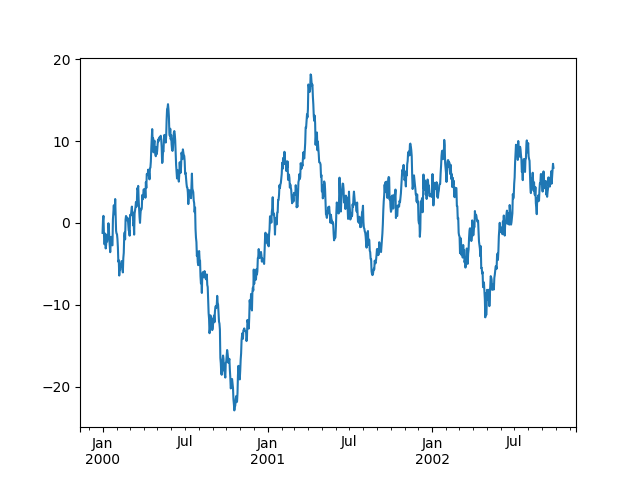

In [63]:
%matplotlib nbagg
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<IPython.core.display.Javascript object>


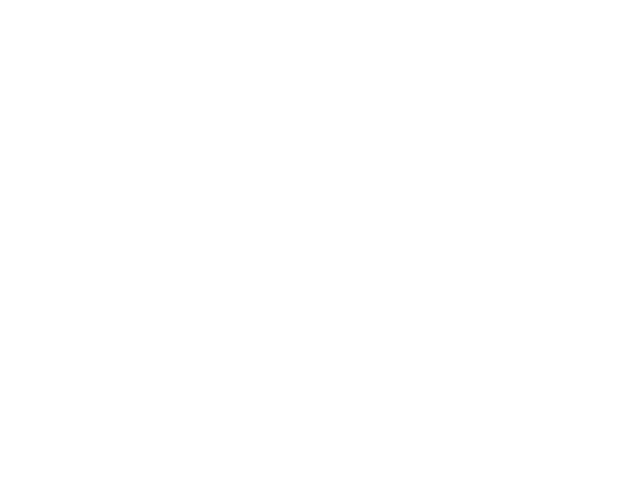

<IPython.core.display.Javascript object>


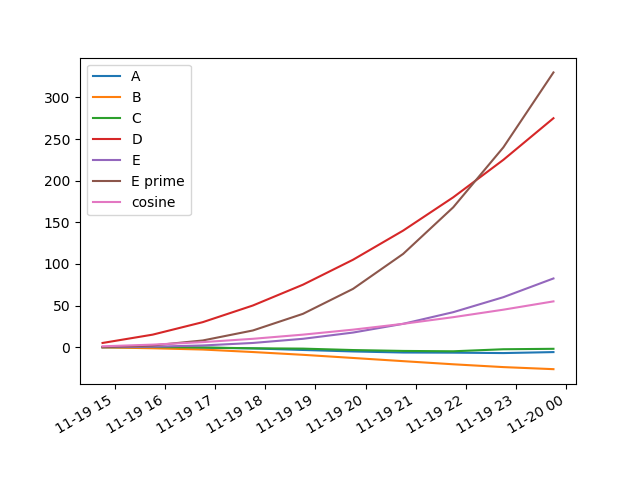

In [64]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')